In [1]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve
import matplotlib.pyplot as plt
from math import pi

In [2]:
bdtype = input('Decide boundary conditions type: ')
alpha = float(input('Select alpha parameter: '))
ts = int(input('Number of time steps: '))

Decide boundary conditions type: Dirichlet
Select alpha parameter: 500
Number of time steps: 750


In [3]:
def u0(x):
    return np.sin(2*pi*x)


def a(x):
    return alpha/(1+x**2)



def s(t,x):
    return np.exp(-30*x**2)*(np.sin(t))**2



M = 100
x = np.linspace(-1,1,M+1)
a = a(x)
h = 2/M
D2 = np.zeros([M+1,M+1])
D2 = np.diag(np.ones(M),-1) -2*np.diag(np.ones(M+1),0) + np.diag(np.ones(M),+1)
D2 = (1/h**2)*D2

D1 = np.zeros([M+1,M+1])
D1 = -np.diag(np.ones(M),-1) + np.diag(np.ones(M),+1)
D1 = (1/(2*h))*D1

In [4]:
tf = .5
k = tf/ts

t = np.linspace(0,tf,ts+1)
Un = u0(x)
UnBE = u0(x)

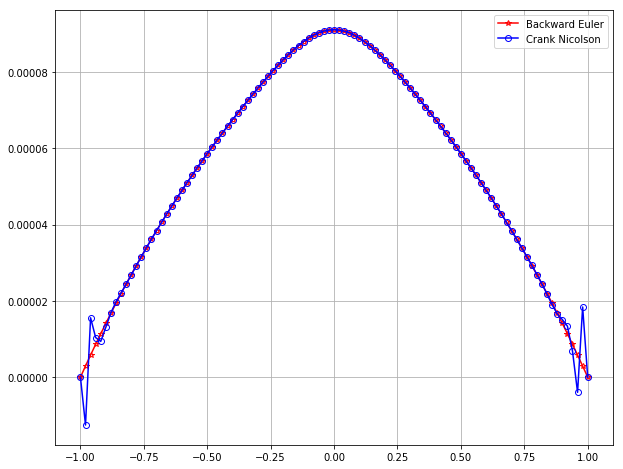

-1.2532940177035301e-05 -3.29495057530196e-14


In [5]:
I = np.eye(M+1)
if (bdtype == 'Dirichlet'):
    AA = k*0.5*(np.diag(a)@D2 + np.diag(D1@a)@D1)
    #Dirichlet boundaries
    AA[0,:]= np.zeros(M+1)
    AA[-1,:]= np.zeros(M+1)
    ludec = lu_factor(I - AA)
    
    
    AAE = k*(np.diag(a)@D2 + np.diag(D1@a)@D1)
    AAE[0,:]= np.zeros(M+1)
    AAE[-1,:]= np.zeros(M+1)
    ludecBE = lu_factor(I - AAE)       
        
    for n in range(ts):
        bb = k*0.5*(s(t[n],x) + s(t[n+1],x) + np.diag(a)@(D2@Un) + np.diag(D1@a)@(D1@Un) )
        bb[0] = 0
        bb[-1] = 0
        uCN = lu_solve(ludec,Un + bb)
    #     uCN = np.linalg.solve(I-AA,Un + bb)
        Un = uCN.copy()

              
        bbE = k*( s(t[n+1],x))
        bbE[0] = 0
        bbE[-1] = 0
        uBE = lu_solve(ludecBE,UnBE + bbE)
        #uBE = np.linalg.solve(I-AAE,UnBE + bbE)
        UnBE = uBE.copy()
elif(bdtype == 'Neumann'):
    D2[0,0] = -2/h**2
    D2[0,1] = 2/h**2
    D2[-1,M-1] = 2/h**2
    D2[-1,M] = -2/h**2
    D1[0,:] = np.zeros(M+1)
    D1[-1,:] = np.zeros(M+1)
    AA = k*0.5*(np.diag(a)@D2 + np.diag(D1@a)@D1)
    AAE = k*(np.diag(a)@D2 + np.diag(D1@a)@D1)
    ludec = lu_factor(I - AA)
    ludecBE = lu_factor(I-AAE)
        
    for n in range(ts):
        bb = k*0.5*(s(t[n],x) + s(t[n+1],x) + np.diag(a)@(D2@Un) + np.diag(D1@a)@(D1@Un) )
        bbE = k*( s(t[n+1],x))
        
        uCN = lu_solve(ludec,Un + bb)
#     uCN = np.linalg.solve(I-AA,Un + bb)
        Un = uCN.copy()
    
    
        uBE = lu_solve(ludecBE,UnBE + bbE)
        #uBE = np.linalg.solve(I-AAE,UnBE + bbE)
        UnBE = uBE.copy()

        

#print(U)
plt.figure(figsize=(10,8))
plt.plot(x,uBE,'r-*',markerfacecolor='None',label='Backward Euler')
plt.plot(x,uCN,'b-o',markerfacecolor='None',label='Crank Nicolson')
plt.legend()
plt.grid()
plt.show()
print(min(uCN),min(uBE))

Plot of order of convergence for the two schemes

In [6]:
if (ts>8000 and alpha <5):
    count = 0
    errCN = []
    errBE = []
    tsrange = np.arange(200,500,50)
    uRifCN = uCN
    uRifBE = uBE
    
    for ts in tsrange:
        Un = u0(x)
        UnBE = u0(x)
        t = np.linspace(0,tf,ts+1)
        k = tf/ts
        if (bdtype == 'Dirichlet'):
            AA = k*0.5*(np.diag(a)@D2 + np.diag(D1@a)@D1)
            #Dirichlet boundaries
            AA[0,:]= np.zeros(M+1)
            AA[-1,:]= np.zeros(M+1)
            ludec = lu_factor(I - AA)
    
    
            AAE = k*(np.diag(a)@D2 + np.diag(D1@a)@D1)
            AAE[0,:]= np.zeros(M+1)
            AAE[-1,:]= np.zeros(M+1)
            ludecBE = lu_factor(I - AAE)       
        
            for n in range(ts):
                bb = k*0.5*(s(t[n],x) + s(t[n+1],x) + np.diag(a)@(D2@Un) + np.diag(D1@a)@(D1@Un) )
                bb[0] = 0
                bb[-1] = 0
                uCN = lu_solve(ludec,Un + bb)
        #     uCN = np.linalg.solve(I-AA,Un + bb)
                Un = uCN.copy()

              
                bbE = k*( s(t[n+1],x))
                bbE[0] = 0
                bbE[-1] = 0
                uBE = lu_solve(ludecBE,UnBE + bbE)
                #uBE = np.linalg.solve(I-AAE,UnBE + bbE)
                UnBE = uBE.copy()
            
            errCN.append(np.linalg.norm(uCN - uRifCN,np.Inf))
            errBE.append(np.linalg.norm(uBE - uRifBE,np.Inf))

        elif(bdtype == 'Neumann'):
            D2[0,0] = -2/h**2
            D2[0,1] = 2/h**2
            D2[-1,M-1] = 2/h**2
            D2[-1,M] = -2/h**2
            D1[0,:] = np.zeros(M+1)
            D1[-1,:] = np.zeros(M+1)
            AA = k*0.5*(np.diag(a)@D2 + np.diag(D1@a)@D1)
            AAE = k*(np.diag(a)@D2 + np.diag(D1@a)@D1)
            ludec = lu_factor(I - AA)
            ludecBE = lu_factor(I-AAE)
            
            for n in range(ts):
                bb = k*0.5*(s(t[n],x) + s(t[n+1],x) + np.diag(a)@(D2@Un) + np.diag(D1@a)@(D1@Un) )
                bbE = k*( s(t[n+1],x))
        
                uCN = lu_solve(ludec,Un + bb)
        #     uCN = np.linalg.solve(I-AA,Un + bb)
                Un = uCN.copy()
    
    
                uBE = lu_solve(ludecBE,UnBE + bbE)
                #uBE = np.linalg.solve(I-AAE,UnBE + bbE)
                UnBE = uBE.copy()
            
            errCN.append(np.linalg.norm(uCN - uRifCN,np.Inf))
            errBE.append(np.linalg.norm(uBE - uRifBE,np.Inf))


    plt.figure(figsize=(8,8))
    plt.loglog(tsrange, errCN, '-o', label='Crank Nicolson')
    plt.loglog(tsrange, errCN[-1] * tsrange[-1] / tsrange, '-', label='ordine 1')
    plt.loglog(tsrange, errCN[-1] * (tsrange[-1] / tsrange) ** 2, '-', label='order 2')
    plt.title('Crank Nicolson')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,8))
    plt.loglog(tsrange, errBE, '-o', label='Backward Euler')
    plt.loglog(tsrange, errBE[-1] * tsrange[-1] / tsrange, '-', label='ordine 1')
    plt.loglog(tsrange, errBE[-1] * (tsrange[-1] / tsrange) ** 2, '-', label='order 2')
    plt.title('Order of convergence  for Back. Euler')
    plt.legend()
    plt.show()

In [7]:
k

0.0006666666666666666